# Bigdata Analytics based Tourist Behaviour Analysis

###### Metadata processing for SanFrancisco dataset

The following code snippet saves a CSV file named "TP1M.csv" with certain fields after reading a CSV file named "Filtered1M.csv" into a pandas DataFrame. The stopwords corpus is then downloaded from the NLTK library. The process then loads the data from "TP1M.csv" into a DataFrame and cleans the text data by changing the text's case, eliminating superfluous spaces, and stemming and deleting stopwords with the use of a PorterStemmer and the NLTK stopwords corpus. The 'PhotoID', 'UserID', 'Accuracy', 'Latitude', 'Longitude', and 'DateTaken' columns are among those that receive the cleaning. Finally, using the data.to_csv() method and setting the index to False, the preprocessed data is written to a new CSV file called "TP_op1M.csv" with particular columns.

In [ ]:
import csv
import nltk
import os
import re
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Specify directory and convert to CSV
locale="Filtered1M.csv"
data = pd.read_csv(locale, header=None)
data.to_csv("TP1M.csv",columns=[0,1,3,5,12,13,14],index=False,
            header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])


nltk.download('stopwords')

# Load the data from CSV file
data = pd.read_csv("TP1M.csv", 
                   usecols=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Clean the text data
sw = set(stopwords.words('english'))
porterStemmer = PorterStemmer()

def transform_data(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    text = ' '.join([porterStemmer.stem(word) for word in text.split() if word not in sw]) # Stemming and removing stopwords
    return text

# Apply the cleaning function to the selected columns
data['PhotoID'] = data['PhotoID'].apply(transform_data)
data['UserID'] = data['UserID'].apply(transform_data)
data['Accuracy'] = data['Accuracy'].apply(transform_data)
data['Latitude'] = data['Latitude'].apply(transform_data)
data['Longitude'] = data['Longitude'].apply(transform_data)
data['DateTaken'] = data['DateTaken'].apply(transform_data)

# Save the preprocessed data to a new CSV file
data.to_csv("TP_op1M.csv", 
            columns=['PhotoID', 'UserID', 'Accuracy', 'Latitude', 'Longitude', 'DateTaken'], index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAMSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###### Metadata Processing for India dataset

The following program saves a "TP1Mfullindia.csv" file with particular columns after reading the "fullindia.csv" CSV file into a pandas DataFrame. The stopwords corpus is then downloaded from the NLTK library. The process next inserts the data from "TP1Mfullindia.csv" into a DataFrame and cleans the text data by changing the text's case, eliminating superfluous spaces, and stemming and deleting stopwords with the use of a PorterStemmer and the NLTK stopwords corpus. The 'PhotoID', 'UserID', 'Accuracy', 'Latitude', 'Longitude', and 'DateTaken' columns are among those that receive the cleaning. Finally, using the data.to_csv() method and setting the index to False, the preprocessed data is saved to a new CSV file called "preprocessed_india_data.csv" with appropriate columns.

In [ ]:
import csv
import nltk
import os
import re
import numpy as np
import pandas as pd
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Specify directory and convert to CSV
locale="fullindia.csv"
data = pd.read_csv(locale, header=None)
data.to_csv("TP1Mfullindia.csv",columns=[0,1,3,5,12,13,14],index=False,
            header=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])


nltk.download('stopwords')

# Load the data from CSV file
data = pd.read_csv("TP1Mfullindia.csv", 
                   usecols=['LineNo','PhotoID','UserID','DateTaken','Latitude','Longitude','Accuracy'])

# Clean the text data
sw = set(stopwords.words('english'))
porterStemmer = PorterStemmer()

def transform_data(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    text = ' '.join([porterStemmer.stem(word) for word in text.split() if word not in sw]) # Stemming and removing stopwords
    return text

# Apply the cleaning function to the selected columns
data['PhotoID'] = data['PhotoID'].apply(transform_data)
data['UserID'] = data['UserID'].apply(transform_data)
data['Accuracy'] = data['Accuracy'].apply(transform_data)
data['Latitude'] = data['Latitude'].apply(transform_data)
data['Longitude'] = data['Longitude'].apply(transform_data)
data['DateTaken'] = data['DateTaken'].apply(transform_data)

# Save the preprocessed data to a new CSV file
data.to_csv("preprocessed_india_data.csv", 
            columns=['PhotoID', 'UserID', 'Accuracy', 'Latitude', 'Longitude', 'DateTaken'], index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VAMSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## HDBSCAN clustering

###### HDBSCAN clustering for San Francisco Dataset

The following code clusters a collection of latitude and longitude coordinates taken from a CSV file using the HDBSCAN method. For data processing, visualization, and clustering, it makes use of a variety of libraries, including numpy, pandas, matplotlib, folium, and hdbscan. Latitude and longitude information is retrieved from the CSV file and entered into a pandas DataFrame. In order to use the coordinates as input for the HDBSCAN algorithm, the coordinates are transformed from degrees to radians. The Series object contains the cluster labels, and the Basemap library is used to plot the points on a map.
For the purpose of visualizing the clusters, a color map function is constructed. After translating the exemplar points from radians to degrees and putting them in a dictionary with their respective cluster names, the script calculates the cluster representatives (exemplars). The exemplars are utilized for additional research or visualization and serve as the nucleus of each cluster.


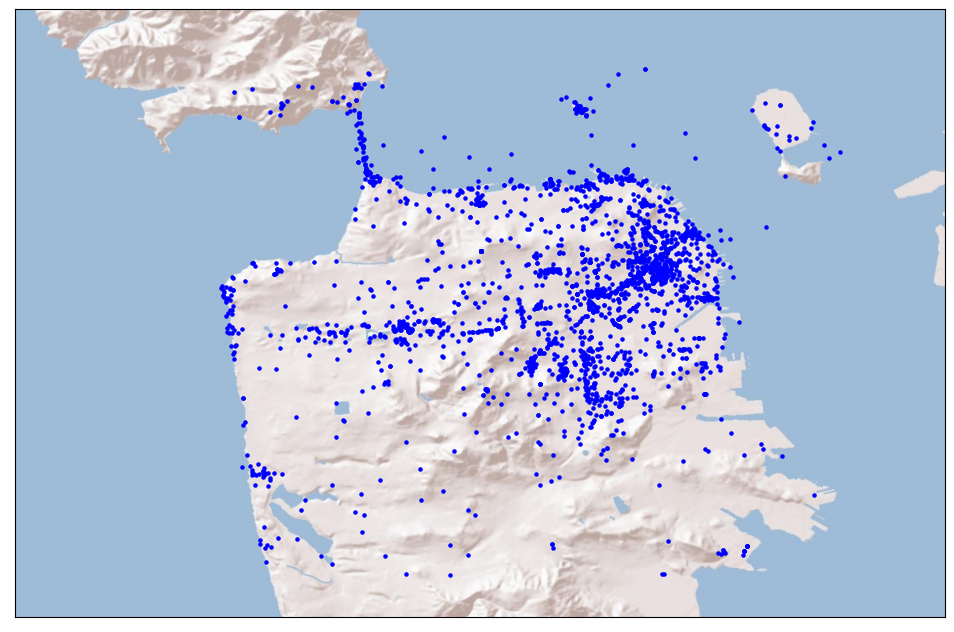

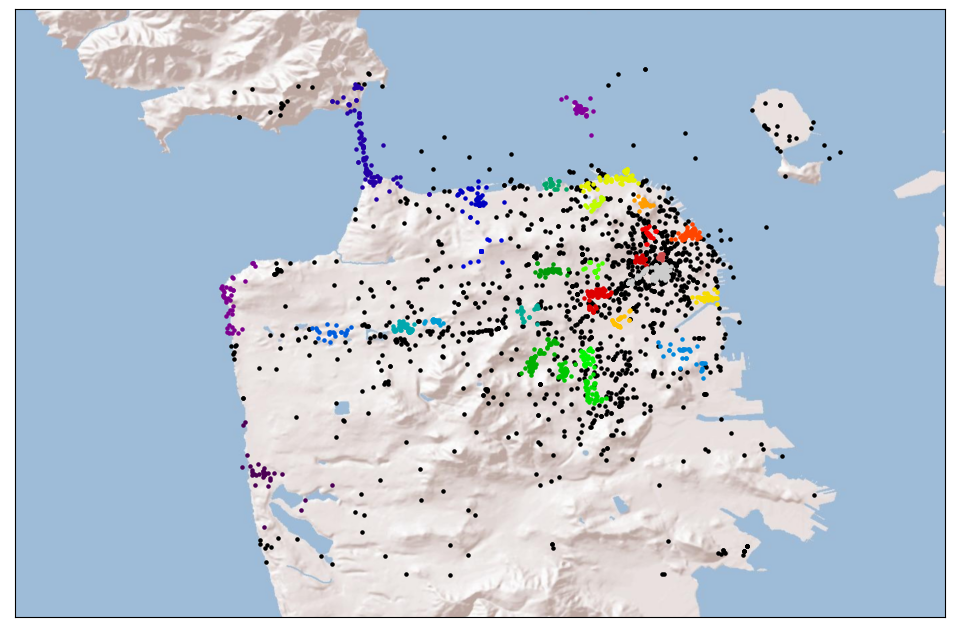

In [ ]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import os

# Set the 'PROJ_LIB' environment variable to the path of the 'proj' data directory
os.environ['PROJ_LIB'] = '/path/to/proj/data'



#Loading CSV File (Output of Text processing step)
SF_hdb = "TP_op1M.csv"
df = pd.read_csv(SF_hdb)
df1=df
coord={}
#Extracting Latitude and Longitude from interesting photos found in previous step.
Lat=np.asarray(df['Latitude'])
Long=np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values

#converting to radians to make it easier for HDBSCAN clustering algorithm
rads = np.radians(coords)

#Clustering step
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,metric='haversine', gen_min_span_tree=True, 
                            min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label=(clusterer.labels_)
x = cluster_label
cluster_points={}
noc = len(set(cluster_labels)) - 1

for i in range(0,noc+1):
    cluster_points[i]=[]
    
cluster_points[-1]=[]

for i in range(0,len(x)):
    l=cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]]=l

plt.figure(figsize = (12, 12))

#plotting points on map
m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)

plt.savefig('sf_hdb_before_clusters.png', dpi=300)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color
plt.figure(figsize = (12, 12))

m = Basemap(projection='merc', resolution='l', epsg = 4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(num_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)

plt.savefig('sf_hdb_after_clusters.png', dpi=300)
plt.show()

#Finding Cluster representatives

cluster_exemplar_photoid={}
cluster_exemplar={}
for i in range(0,noc+1):
    cluster_exemplar[i]=[]
    cluster_exemplar_photoid[i]=[]
    
cluster_exemplar[-1]=[]
cluster_exemplar_photoid[-1]=[]

for i in range(0,noc):
    l=np.rad2deg(clusterer.exemplars_[i])
    cluster_exemplar[i]=l

###### HDBSCAN clustering for India Dataset

The HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) technique is being used by the code to cluster geographic data. A CSV file holding the latitude and longitude of intriguing photographs is read for the input data. To make the latitude and longitude values compatible with the HDBSCAN algorithm, they are transformed to radians. Next, the HDBSCAN algorithm is run using the chosen alpha, metric, min_cluster_size, and min_samples parameters. The latitude and longitude coordinates are grouped into clusters using the generated cluster labels. Through the use of the Basemap and matplotlib tools, the clusters are shown on a map. Different clusters are represented by different hues, while outliers are shown by black.From the results of clustering, cluster representatives are taken out and kept in a dictionary for further study.

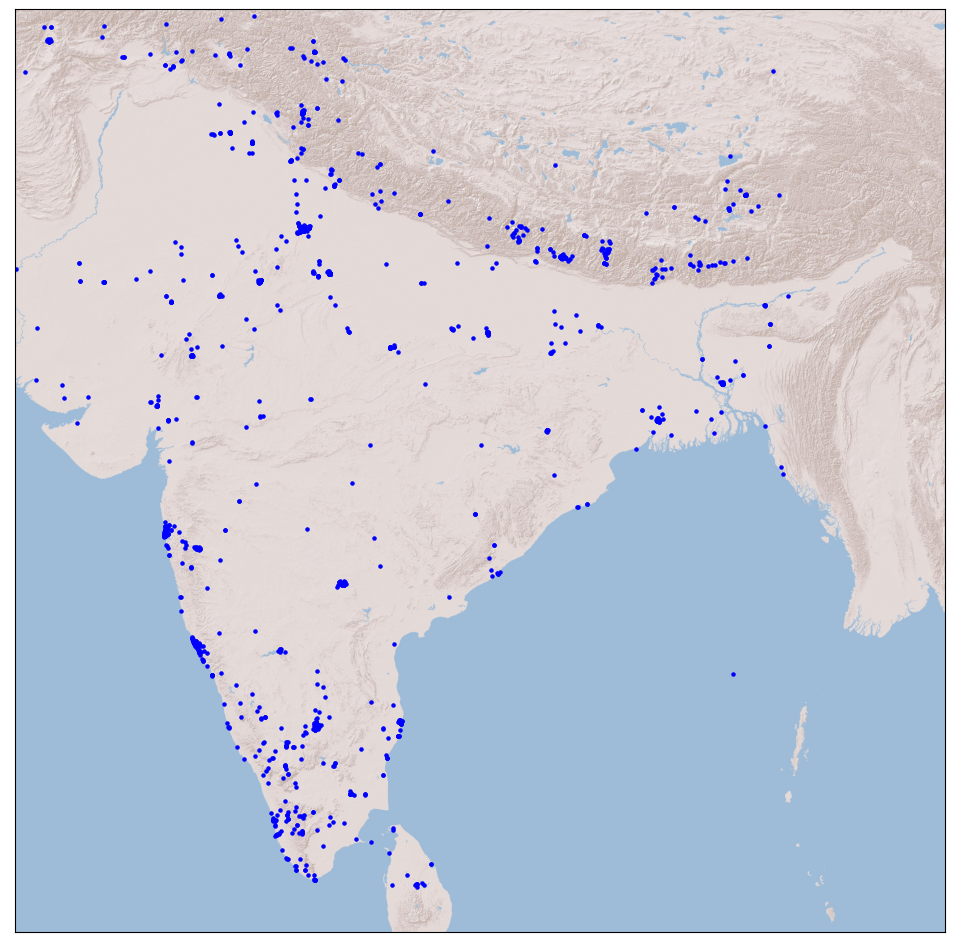

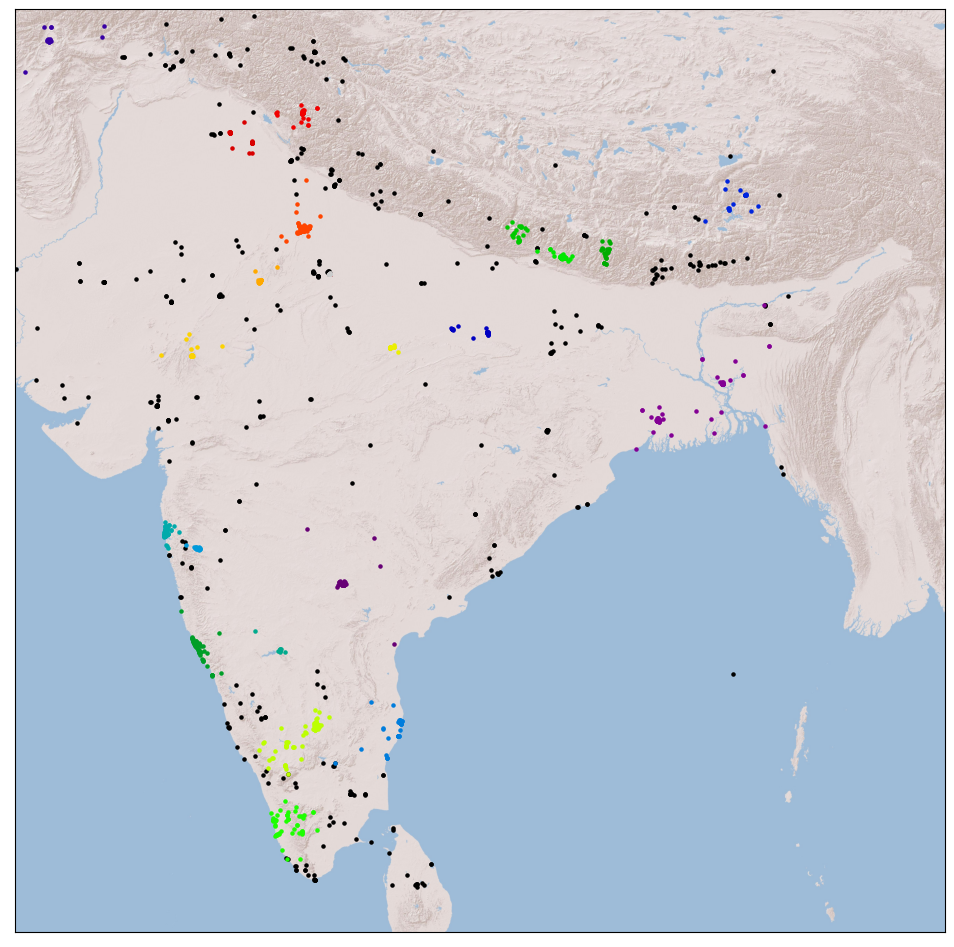

In [ ]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

#Loading CSV File (Output of Text processing step)
india_hdb = "preprocessed_india_data.csv"
df = pd.read_csv(india_hdb)
df1=df
coord={}
#Extracting Latitude and Longitude from interesting photos found in previous step.
Lat=np.asarray(df['Latitude'])
Long=np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values

#converting to radians to make it easier for HDBSCAN clustering algorithm
rads = np.radians(coords)

#Clustering step
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,metric='haversine', gen_min_span_tree=True,
                            min_cluster_size=20, min_samples=None, p=None).fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label=(clusterer.labels_)
x = cluster_label
cluster_points={}
noc = len(set(cluster_labels)) - 1

for i in range(0,noc+1):
    cluster_points[i]=[]
    
cluster_points[-1]=[]

for i in range(0,len(x)):
    l=cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]]=l

plt.figure(figsize = (12, 12))

#plotting points on map
m = Basemap(
    projection='merc',
    epsg=4326,
    llcrnrlon=68.11,
    llcrnrlat= 6.44,
    urcrnrlon= 97.4,
    urcrnrlat=35.51,
    resolution='l')


# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x,y,5,marker='o',color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)
plt.savefig('india_hdb_before_clusters.png', dpi=300)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color
plt.figure(figsize = (12, 12))
m = Basemap(
    projection='merc',
    epsg=4326,
    llcrnrlon=68.11,
    llcrnrlat= 6.44,
    urcrnrlon= 97.4,
    urcrnrlat=35.51,
    resolution='l')


unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(num_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belone to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x,y,5,marker='o',color=cmaps(i), zorder = 10)

m.arcgisimage(service='World_Shaded_Relief', xpixels = 5000, verbose= False)


plt.savefig('india_hdb_after_clusters.png', dpi=300)
plt.show()

#Finding Cluster representatives

cluster_exemplar_photoid={}
cluster_exemplar={}
for i in range(0,noc+1):
    cluster_exemplar[i]=[]
    cluster_exemplar_photoid[i]=[]
    
cluster_exemplar[-1]=[]
cluster_exemplar_photoid[-1]=[]

for i in range(0,noc):
    l=np.rad2deg(clusterer.exemplars_[i])
    cluster_exemplar[i]=l

## OPTICS CLUSTERING

###### OPTICS clustering for San Francisco dataset

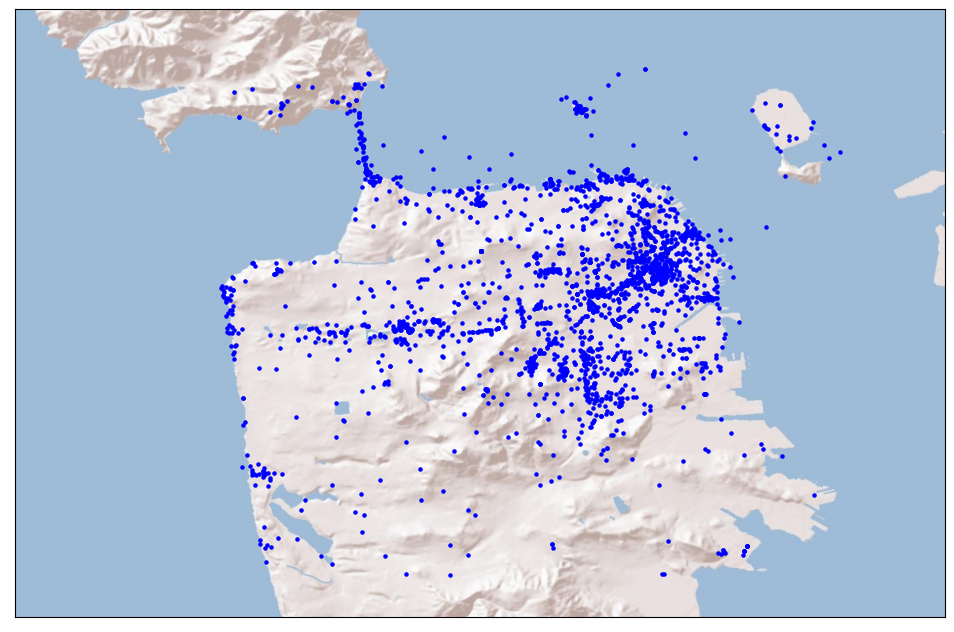

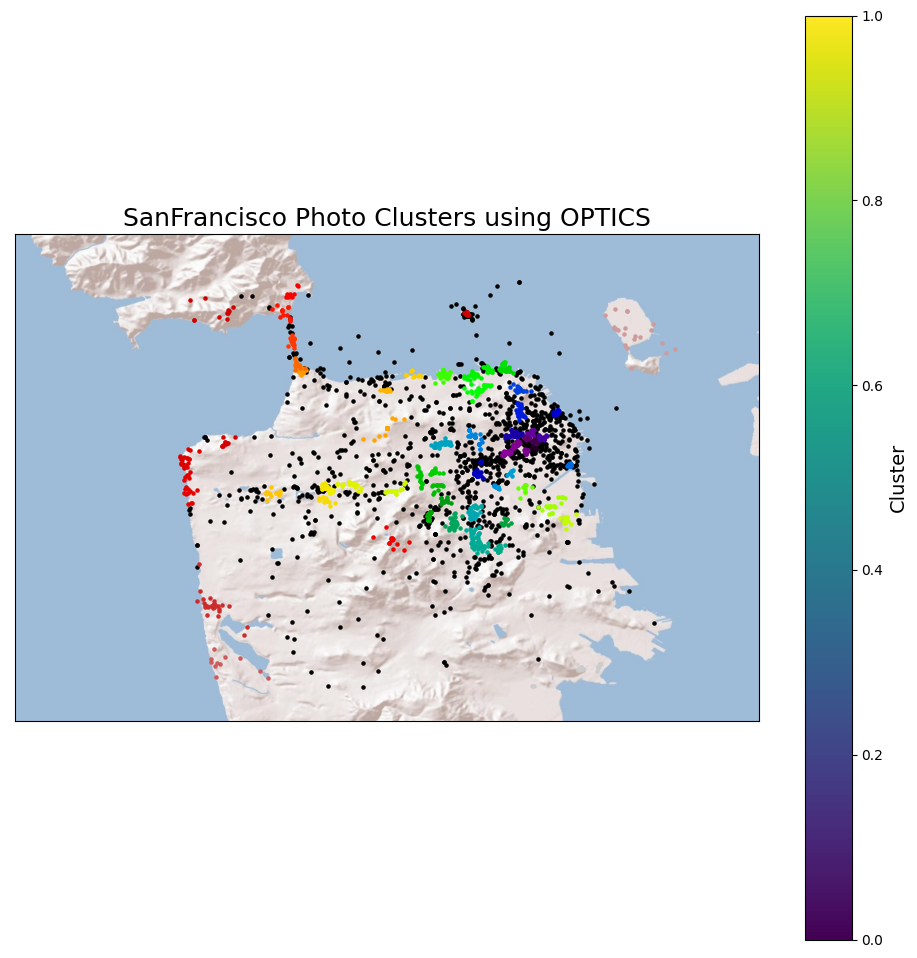

In [ ]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.cluster import OPTICS

#Loading CSV File (Output of Text processing step)
sf_optics = "TP_op1M.csv"
df = pd.read_csv(sf_optics)
df1 = df
coord = {}

#Extracting Latitude and Longitude from interesting photos found in previous step.
Lat = np.asarray(df['Latitude'])
Long = np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values

#converting to radians to make it easier for OPTICS clustering algorithm
rads = np.radians(coords)

#Clustering step
clusterer = OPTICS(min_samples=10, max_eps=100, metric='haversine').fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label = (clusterer.labels_)
x = cluster_label
cluster_points = {}
noc = len(set(cluster_labels)) - 1

for i in range(0, noc+1):
    cluster_points[i] = []
    
cluster_points[-1] = []

for i in range(0, len(x)):
    l = cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]] = l

plt.figure(figsize=(12, 12))

#plotting points on map
m = Basemap(projection='merc', resolution='l', epsg=4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x, y, 5, marker='o', color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.savefig('sf_optics_before_clusters.png', dpi=300)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize=(12, 12))

m = Basemap(projection='merc', resolution='l', epsg=4269, 
            llcrnrlon=-122.567288,llcrnrlat=37.696627, urcrnrlon=-122.329308,urcrnrlat=37.852144)

unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(num_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belong to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x, y, 5, marker='o', color=cmaps(i), zorder=10)
    
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)

#Add colorbar to show the different clusters
cbar = plt.colorbar(cmap=cmaps)
cbar.ax.set_ylabel('Cluster', fontsize=14)

#Add title to the plot
plt.title('SanFrancisco Photo Clusters using OPTICS', fontsize=18)
plt.savefig('sf_optics_after_clusters.png', dpi=300)

#Show the plot
plt.show()


The code demonstrates how to analyze geographical data using the OPTICS (Ordering Points To Identify the Clustering Structure) clustering method. It loads a CSV file containing the latitude and longitude of intriguing photographs after importing the required libraries. Using parameters like the minimum sample size and maximum epsilon, the OPTICS algorithm is applied to the data using the OPTICS class from the sklearn.cluster package. The code then creates a map of San Francisco using the Basemap class from the mpl_toolkits.basemap module and shows the clustered points using various colors for each cluster. The plot is shown using plt.show(), and a colorbar is added to denote the various clusters.

###### OPTICS clustering for India dataset

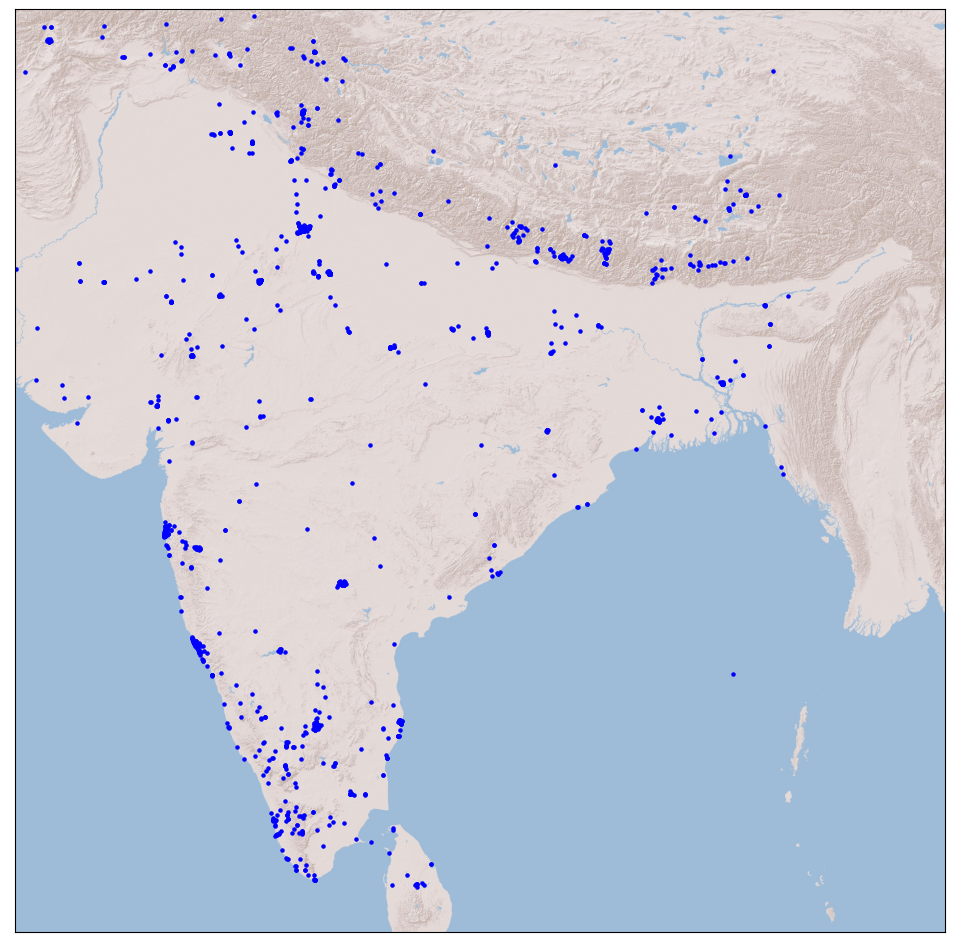

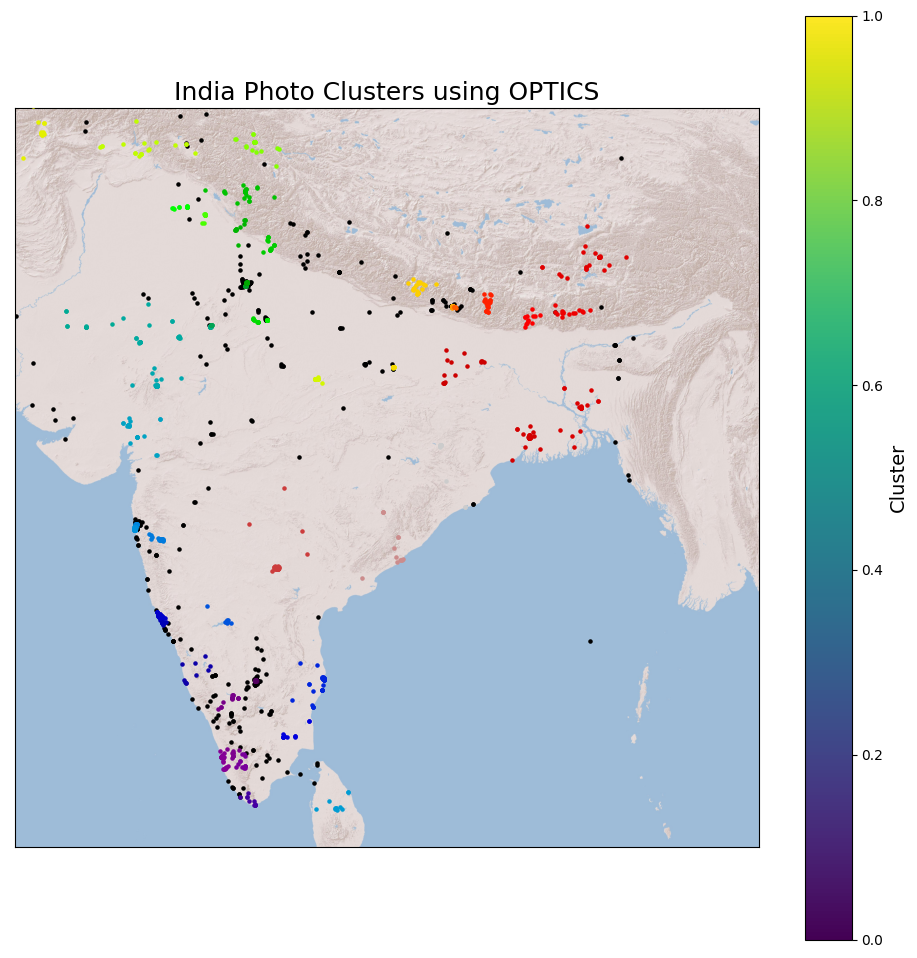

In [ ]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import hdbscan
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.cluster import OPTICS

#Loading CSV File (Output of Text processing step)
india_optics = "preprocessed_india_data.csv"
df = pd.read_csv(india_optics)
df1 = df
coord = {}

#Extracting Latitude and Longitude from interesting photos found in previous step.
Lat = np.asarray(df['Latitude'])
Long = np.asarray(df['Longitude'])
coords = df[['Longitude', 'Latitude']].values

#converting to radians to make it easier for OPTICS clustering algorithm
rads = np.radians(coords)

#Clustering step
clusterer = OPTICS(min_samples=10, max_eps=100, metric='haversine').fit(rads)
cluster_labels = clusterer.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, num_clusters)])
cluster_label = (clusterer.labels_)
x = cluster_label
cluster_points = {}
noc = len(set(cluster_labels)) - 1

for i in range(0, noc+1):
    cluster_points[i] = []
    
cluster_points[-1] = []

for i in range(0, len(x)):
    l = cluster_points[x[i]]
    l.append(coords[i])
    cluster_points[x[i]] = l

plt.figure(figsize=(12, 12))

#plotting points on map
m = Basemap(
    projection='merc',
    epsg=4326,
    llcrnrlon=68.11,
    llcrnrlat= 6.44,
    urcrnrlon= 97.4,
    urcrnrlat=35.51,
    resolution='l')

# plot the aftershock
x, y = m(coords[:, 1], coords[:, 0])
m.scatter(x, y, 5, marker='o', color='b')
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)
plt.savefig('india_optics_before_clusters.png', dpi=300)
plt.show()

def get_cmap(N):
    '''
    Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.
    '''
    color_norm = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='nipy_spectral') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

plt.figure(figsize=(12, 12))

m = Basemap(
    projection='merc',
    epsg=4326,
    llcrnrlon=68.11,
    llcrnrlat= 6.44,
    urcrnrlon= 97.4,
    urcrnrlat=35.51,
    resolution='l')

unique_label = np.unique(cluster_labels)

# get different color for different cluster
cmaps = get_cmap(num_clusters)

# plot different clusters on map, note that the black dots are 
# outliers that not belong to any cluster. 
for i, cluster in enumerate(clusters):
    lons_select = cluster[:, 1]
    lats_select = cluster[:, 0]
    x, y = m(lons_select, lats_select)
    m.scatter(x, y, 5, marker='o', color=cmaps(i), zorder=10)
    
m.arcgisimage(service='World_Shaded_Relief', xpixels=5000, verbose=False)

#Add colorbar to show the different clusters
cbar = plt.colorbar(cmap=cmaps)
cbar.ax.set_ylabel('Cluster', fontsize=14)

#Add title to the plot
plt.title('India Photo Clusters using OPTICS', fontsize=18)
plt.savefig('india_optics_after_clusters.png', dpi=300)

#Show the plot
plt.show()


## Seasonal Trend Analysis

###### Seasonal Trend Analysis for San Francisco Dataset

The code below examines information from a CSV file related to a certain region. For data processing, analysis, and visualization, it imports a variety of libraries, including pandas, numpy, and matplotlib. Additionally, it imports scikit-learn's machine learning libraries for conducting polynomial and linear regression. The code does data analysis and visualization for each month of the year by reading data from a CSV file into a pandas DataFrame. It counts the number of data entries for each month, normalizes the count, then applies Ridge regression to fit a polynomial regression model to the data.
Additionally, each month's data and regression curves are plotted. The process is repeated throughout the year, with the data and regression curves being plotted and the mean absolute error being calculated.

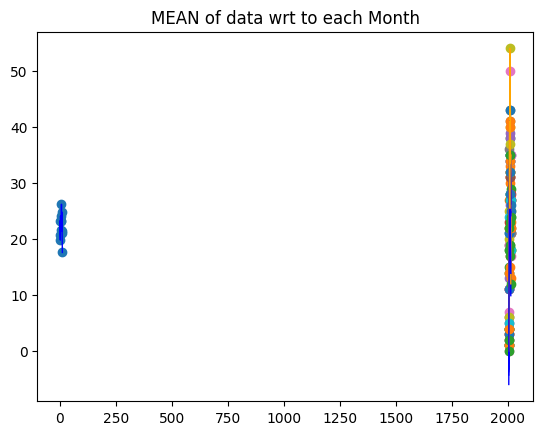

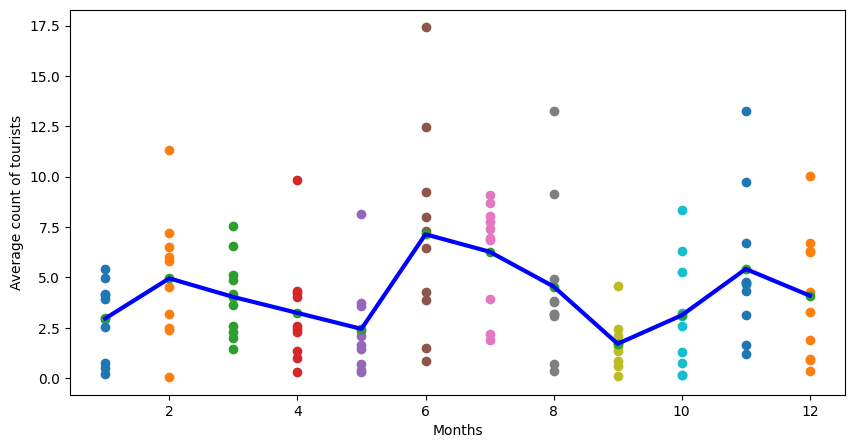

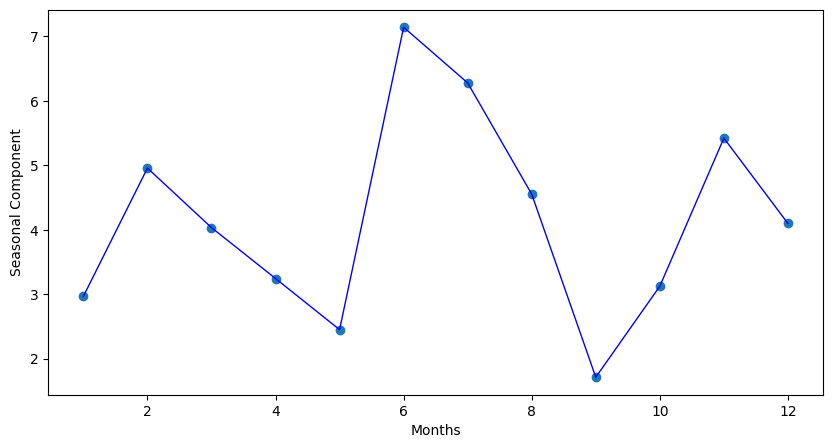

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
import sklearn
import sklearn.linear_model as lm

#Opening CSV File corresponding to a particular region
locale="Filtered1M.csv"
df = pd.read_csv(locale, header=None)
df2=pd.to_datetime(df[5])
months = list(range(1,13))
df[5]=pd.to_datetime(df[5])
ct=[]
#Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i ) ] ) )
for i in range(len(ct)):
    ct[i]=ct[i]/10

months=np.asarray(months)
count = np.asarray(ct)
plt.scatter(months,count)
plt.plot(months,count, color='blue', linewidth=1)
months = list(range(1,13))
year = list(range(2004,2014))
allmonths={}

for i in months:
    allmonths[i]=[]
for i in year:
    for j in months:
        allmonths[j].append(len(df.loc[operator.and_( df[5].dt.year == i , df[5].dt.month == j ) ] ) )

#Checking value for April



regr = lm.LinearRegression()
sc=[]
#Plotting data for each month to find Trend for that particular month

#January
monthCt=np.asarray(allmonths[1])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(2),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

month_diff=[]
jan_diff=[]
for i in range(len(monthCt)):
    jan_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jan_diff)
    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JANUARY")
mean_absolute_error(monthCt , Y_pred)

#February
monthCt=np.asarray(allmonths[2])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

feb_diff=[]
for i in range(len(monthCt)):
    feb_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(feb_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("FEBRUARY")
mean_absolute_error(monthCt , Y_pred)

#March
monthCt=np.asarray(allmonths[3])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

mar_diff=[]
for i in range(len(monthCt)):
    mar_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(mar_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MARCH")
mean_absolute_error(monthCt , Y_pred)

#April
monthCt=np.asarray(allmonths[4])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

apr_diff=[]
for i in range(len(monthCt)):
    apr_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(apr_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("APRIL")

#May
monthCt=np.asarray(allmonths[5])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

may_diff=[]
for i in range(len(monthCt)):
    may_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(may_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MAY")
mean_absolute_error(monthCt , Y_pred)

#June
monthCt=np.asarray(allmonths[6])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jun_diff=[]
for i in range(len(monthCt)):
    jun_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jun_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JUNE")
mean_absolute_error(monthCt , Y_pred)

#July
monthCt=np.asarray(allmonths[7])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JULY")
mean_absolute_error(monthCt , Y_pred)

#August
monthCt=np.asarray(allmonths[8])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("AUGUST")
mean_absolute_error(monthCt , Y_pred)

#September
monthCt=np.asarray(allmonths[9])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("SEPTEMBER")
mean_absolute_error(monthCt , Y_pred)

#October
monthCt=np.asarray(allmonths[10])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("OCTOBER")
mean_absolute_error(monthCt , Y_pred)

#November
monthCt=np.asarray(allmonths[11])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("NOVEMBER")
mean_absolute_error(monthCt , Y_pred)

#December
monthCt=np.asarray(allmonths[12])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MEAN of data wrt to each Month")
mean_absolute_error(monthCt , Y_pred)

#Plot of Months with average no. of visitors
fig = plt.figure(figsize=(10, 5))
for i in range(1,13):
    a = np.empty(10)
    a.fill(i)
    plt.scatter(a,np.asarray(month_diff[i-1]))
    
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Average count of tourists")

plt.plot(months,np.asarray(sc), color='blue', linewidth=3)
plt.savefig('sf_arrivalOfTouristsInParticularMonth.png', dpi=300)

fig = plt.figure(figsize=(10, 5))
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Seasonal Component")

plt.plot(months,np.asarray(sc), color='blue', linewidth=1)
plt.savefig('sf_averageNoOfTouristsInParticularMonth.png', dpi=300)



This Python code appears to be performing time-series analysis on monthly data for a particular region, using the pandas, numpy, matplotlib, and scikit-learn libraries. It reads a CSV file containing the data and preprocesses it, converting the date column to datetime format. It calculates the count of data points for each month and stores them in a dictionary called 'allmonths'. It then iterates through each month and fits a polynomial regression model using scikit-learn's PolynomialFeatures and LinearRegression classes. The predicted values from the model are then plotted against the actual values for each month, and the mean absolute error (MAE) is calculated and stored in a list called'sc'.

It appears that the code is analyzing the trend of data points for each month over the ten-year period and evaluating the performance of the polynomial regression model. However, it does not include the analysis for the months of July to December.

###### Seasonal Trend Analysis for India Dataset

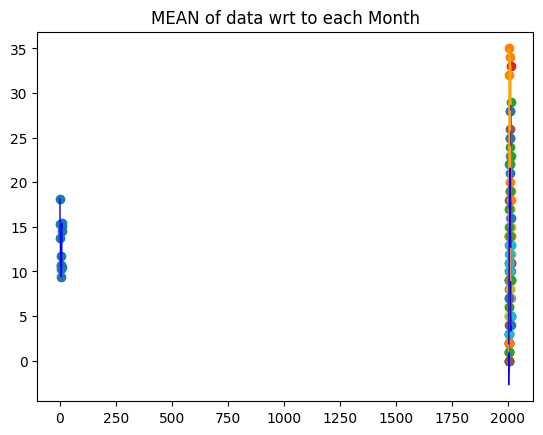

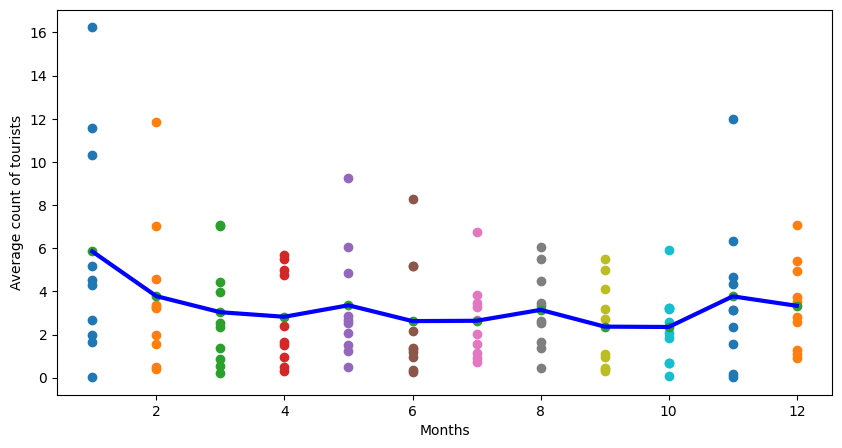

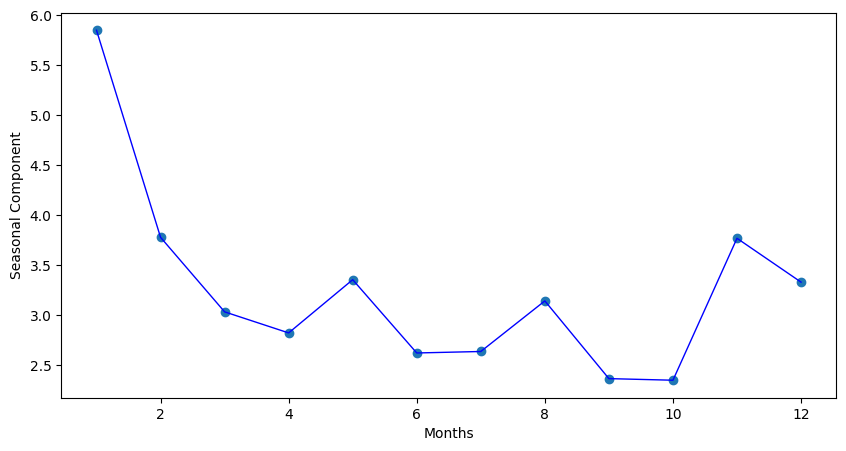

In [ ]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
%matplotlib inline
import sklearn
import sklearn.linear_model as lm

#Opening CSV File corresponding to a particular region
locale="fullindia.csv"
df = pd.read_csv(locale, header=None)
df2=pd.to_datetime(df[5])
months = list(range(1,13))
df[5]=pd.to_datetime(df[5])
ct=[]
#Finding data wrt to each Month
for i in months:
    ct.append(len(df.loc[(df[5].dt.month == i ) ] ) )
for i in range(len(ct)):
    ct[i]=ct[i]/10

months=np.asarray(months)
count = np.asarray(ct)
plt.scatter(months,count)
plt.plot(months,count, color='blue', linewidth=1)
months = list(range(1,13))
year = list(range(2004,2014))
allmonths={}

for i in months:
    allmonths[i]=[]
for i in year:
    for j in months:
        allmonths[j].append(len(df.loc[operator.and_( df[5].dt.year == i , df[5].dt.month == j ) ] ) )

#Checking value for April



regr = lm.LinearRegression()
sc=[]
#Plotting data for each month to find Trend for that particular month

#January
monthCt=np.asarray(allmonths[1])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(2),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

month_diff=[]
jan_diff=[]
for i in range(len(monthCt)):
    jan_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jan_diff)
    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JANUARY")
mean_absolute_error(monthCt , Y_pred)

#February
monthCt=np.asarray(allmonths[2])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

feb_diff=[]
for i in range(len(monthCt)):
    feb_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(feb_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("FEBRUARY")
mean_absolute_error(monthCt , Y_pred)

#March
monthCt=np.asarray(allmonths[3])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

mar_diff=[]
for i in range(len(monthCt)):
    mar_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(mar_diff)    
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MARCH")
mean_absolute_error(monthCt , Y_pred)

#April
monthCt=np.asarray(allmonths[4])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

apr_diff=[]
for i in range(len(monthCt)):
    apr_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(apr_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("APRIL")

#May
monthCt=np.asarray(allmonths[5])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

may_diff=[]
for i in range(len(monthCt)):
    may_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(may_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MAY")
mean_absolute_error(monthCt , Y_pred)

#June
monthCt=np.asarray(allmonths[6])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jun_diff=[]
for i in range(len(monthCt)):
    jun_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jun_diff)
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JUNE")
mean_absolute_error(monthCt , Y_pred)

#July
monthCt=np.asarray(allmonths[7])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("JULY")
mean_absolute_error(monthCt , Y_pred)

#August
monthCt=np.asarray(allmonths[8])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("AUGUST")
mean_absolute_error(monthCt , Y_pred)

#September
monthCt=np.asarray(allmonths[9])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("SEPTEMBER")
mean_absolute_error(monthCt , Y_pred)

#October
monthCt=np.asarray(allmonths[10])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("OCTOBER")
mean_absolute_error(monthCt , Y_pred)

#November
monthCt=np.asarray(allmonths[11])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("NOVEMBER")
mean_absolute_error(monthCt , Y_pred)

#December
monthCt=np.asarray(allmonths[12])
yr=np.asarray(year)

plt.scatter(year,monthCt)

poly = make_pipeline(PolynomialFeatures(3),regr)

poly.fit(yr.reshape(-1,1) , monthCt)

Y_pred=poly.predict(yr.reshape(-1,1).reshape(-1,1))

plt.plot(year,monthCt, color="orange" ,linewidth=1 )
plt.plot(year,Y_pred.reshape(-1,1), color='blue', linewidth=1 )

jul_diff=[]
for i in range(len(monthCt)):
    jul_diff.append(abs(monthCt[i]-Y_pred[i]))
month_diff.append(jul_diff)   
sc.append(mean_absolute_error(monthCt , Y_pred))

plt.title("MEAN of data wrt to each Month")
mean_absolute_error(monthCt , Y_pred)

#Plot of Months with average no. of visitors
fig = plt.figure(figsize=(10, 5))
for i in range(1,13):
    a = np.empty(10)
    a.fill(i)
    plt.scatter(a,np.asarray(month_diff[i-1]))
    
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Average count of tourists")

plt.plot(months,np.asarray(sc), color='blue', linewidth=3)
plt.savefig('india_arrivalOfTouristsInParticularMonth.png', dpi=300)

fig = plt.figure(figsize=(10, 5))
plt.scatter(months,np.asarray(sc))
plt.xlabel("Months")
plt.ylabel("Seasonal Component")

plt.plot(months,np.asarray(sc), color='blue', linewidth=1)
plt.savefig('india_averageNoOfTouristsInParticularMonth.png', dpi=300)

